In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from numba import jit
import os 
import glob 
import torch as th
import torch.nn as nn
import torch.optim as optim
import sklearn.model_selection as selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.stats import ttest_rel
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, precision_score, recall_score


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score


In [ ]:
cleaned_dataset=pd.read_csv('https://raw.githubusercontent.com/JessicaM16/COMP3610-Project/main/Project/CleanedData.csv')

In [ ]:
cleaned_dataset.head()

,Unnamed: 0.4,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1
0,0,0,194.033698,Private room,False,True,2.0,False,10.0,93.0,1,5.022964,2.539380,NaN,NaN,NaN
1,1,1,344.245776,Private room,False,True,4.0,False,8.0,85.0,1,0.488389,0.239404,NaN,NaN,NaN
2,2,2,264.101422,Private room,False,True,2.0,False,9.0,87.0,1,5.748312,3.651621,NaN,NaN,NaN
3,3,3,433.529398,Private room,False,True,4.0,False,9.0,90.0,2,0.384862,0.439876,NaN,NaN,NaN
4,4,4,485.552926,Private room,False,True,2.0,True,10.0,98.0,1,0.544738,0.318693,NaN,NaN,NaN


In [ ]:
cleaned_dataset.shape

(206828, 16)

In [ ]:
cleaned_dataset['guest_satisfaction_overall'].unique()

array([ 93.,  85.,  87.,  90.,  98., 100.,  94.,  96.,  88.,  97.,  95.,
        89.,  91.,  84.,  77.,  99.,  80.,  92.,  82.,  78.,  86.,  74.,
        81.,  83.,  73.,  76.,  75.,  70.,  65.,  47.,  60.,  20.,  40.,
        72.,  79.,  68.,  57.,  56.,  67.,  50.,  53.,  63.,  71.,  66.,
        64.,  69.,  62.,  30.,  44.,  46.,  55.,  61.,  54.])

In [ ]:
cleaned_dataset['guest_satisfaction_overall'].value_counts().unique()

array([42724, 15556, 14504, 14128, 13316, 13196, 10460, 10428,  9364,
        8236,  8100,  7196,  5460,  5236,  5036,  3096,  3088,  2660,
        2356,  1900,  1416,  1076,   840,   744,   708,   696,   692,
         664,   652,   620,   492,   400,   324,   292,   204,   176,
         132,   128,    84,    64,    56,    52,    32,    24,    20,
          16,     8,     4])

In [ ]:
cleaned_dataset.guest_satisfaction_overall.value_counts()

100.0    42724
98.0     15556
97.0     14504
96.0     14128
93.0     13316
95.0     13196
94.0     10460
90.0     10428
99.0      9364
80.0      8236
92.0      8100
91.0      7196
88.0      5460
89.0      5236
87.0      5036
85.0      3096
86.0      3088
84.0      2660
83.0      2356
60.0      1900
82.0      1416
70.0      1076
81.0       840
73.0       744
78.0       708
75.0       696
76.0       692
77.0       664
79.0       652
20.0       620
40.0       492
67.0       400
74.0       324
72.0       292
71.0       204
50.0       176
68.0       132
69.0       128
65.0       128
63.0        84
47.0        64
53.0        56
64.0        52
30.0        32
66.0        24
57.0        20
56.0        20
62.0        16
55.0        16
44.0         8
46.0         4
61.0         4
54.0         4
Name: guest_satisfaction_overall, dtype: int64

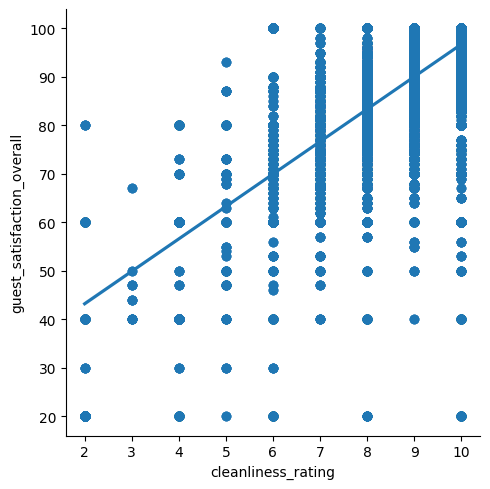

In [ ]:
sns.lmplot(x='cleanliness_rating', y='guest_satisfaction_overall', data=cleaned_dataset)

(0.0, 110.0)

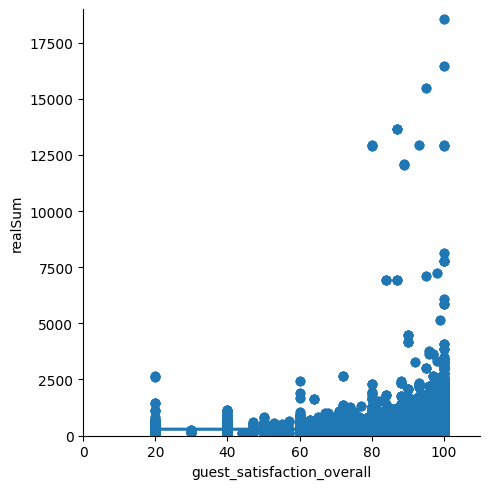

In [ ]:
sns.lmplot(x='guest_satisfaction_overall', y='realSum', data=cleaned_dataset)
# Tweak axes using Matplotlib
plt.ylim(0, 19000)
plt.xlim(0, 110)

(0.0, 110.0)

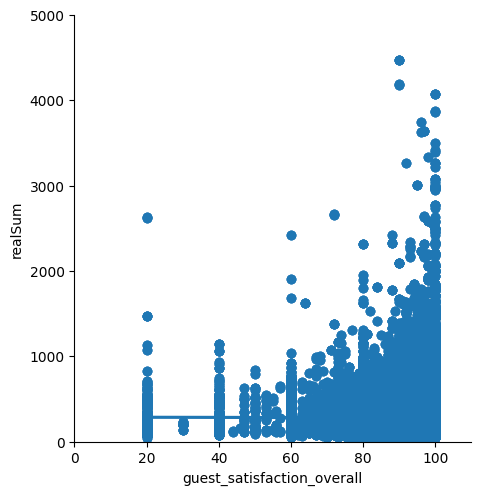

In [ ]:
#We can see the majority of the points cluster in the range of 0 to 5000
sns.lmplot(x='guest_satisfaction_overall', y='realSum', data=cleaned_dataset)
# Tweak axes using Matplotlib
plt.ylim(0, 5000)
plt.xlim(0, 110)

In [ ]:
to_drop = ['Unnamed: 0','Unnamed: 0.4','Unnamed: 0.3',	'Unnamed: 0.2',	'Unnamed: 0.1']
cleaned_dataset = cleaned_dataset.drop(to_drop, axis=1)

<Axes: >

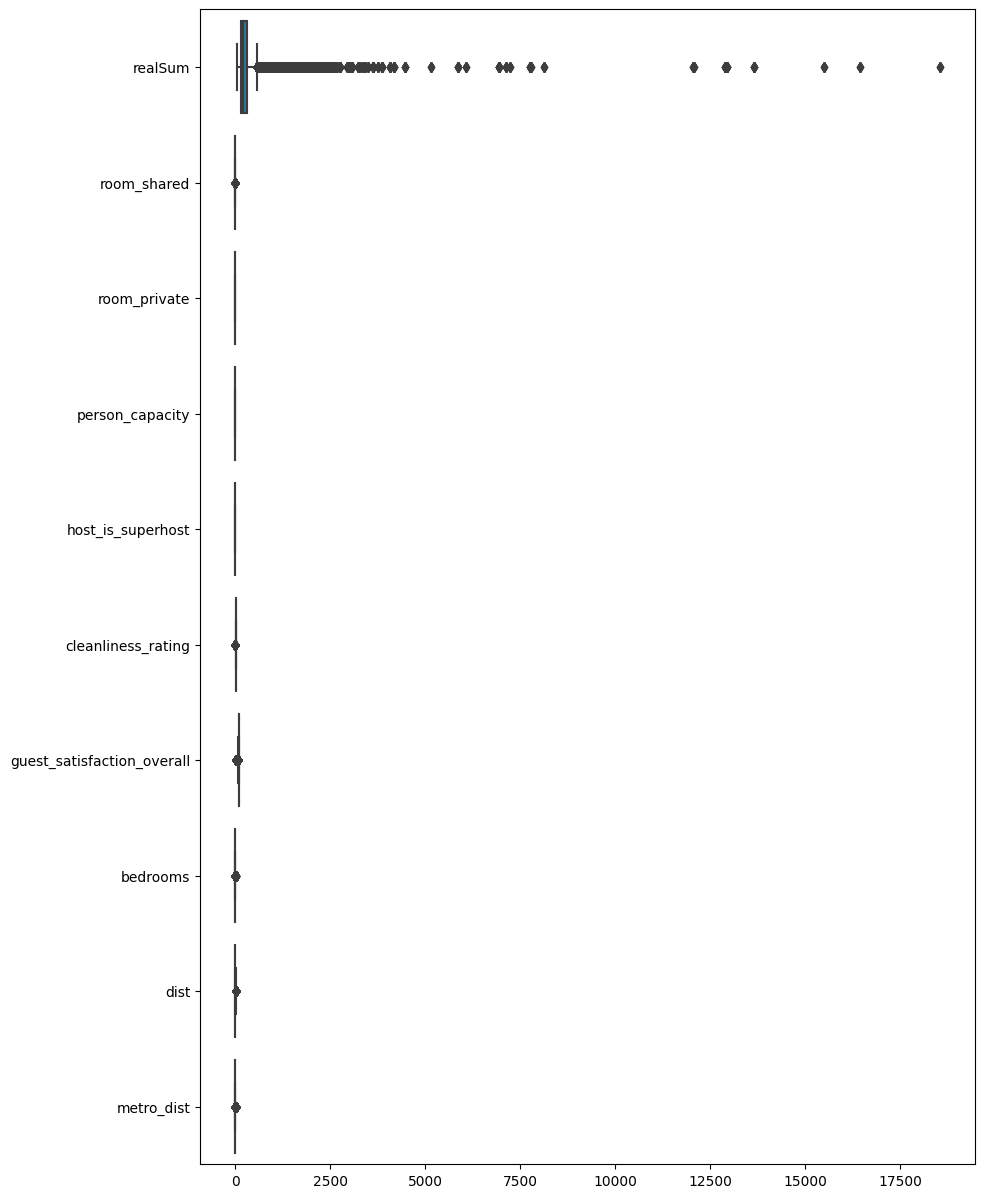

In [ ]:


plt.figure(figsize=(10, 15))
sns.boxplot(data=cleaned_dataset, orient='h')

In [ ]:

cleaned_dataset.corr(method ='pearson')

<ipython-input-13-6add62b474b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cleaned_dataset.corr(method ='pearson')


,realSum,room_shared,room_private,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
realSum,1.000000,-0.035095,-0.171949,0.203077,-0.045478,-0.006082,-0.001888,0.221653,-0.044725,-0.061025
room_shared,-0.035095,1.000000,-0.063533,0.035146,-0.027839,-0.040097,-0.027876,-0.021365,0.014144,-0.002868
room_private,-0.171949,-0.063533,1.000000,-0.499993,-0.049501,-0.030983,-0.033401,-0.155889,0.213351,0.101981
person_capacity,0.203077,0.035146,-0.499993,1.000000,0.031431,0.003256,0.005181,0.560627,-0.128488,-0.037267
host_is_superhost,-0.045478,-0.027839,-0.049501,0.031431,1.000000,0.272376,0.280062,0.024250,-0.056113,-0.000722
cleanliness_rating,-0.006082,-0.040097,-0.030983,0.003256,0.272376,1.000000,0.714045,0.033489,-0.030202,0.010441
guest_satisfaction_overall,-0.001888,-0.027876,-0.033401,0.005181,0.280062,0.714045,1.000000,0.047573,-0.004178,0.029788
bedrooms,0.221653,-0.021365,-0.155889,0.560627,0.024250,0.033489,0.047573,1.000000,-0.006262,0.044431
dist,-0.044725,0.014144,0.213351,-0.128488,-0.056113,-0.030202,-0.004178,-0.006262,1.000000,0.558064
metro_dist,-0.061025,-0.002868,0.101981,-0.037267,-0.000722,0.010441,0.029788,0.044431,0.558064,1.000000


<b>correlation relationships:</b>

guest satisfaction and cleanliness rating 0.7

bedrooms and person_capacity 0.5

dist and metro_dist 0.5

guest satisfaction and superhost 0.2 

bedrooms with real sum 0.2

room_private and dist 0.2

<ipython-input-14-2a8fa54b1a9a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cleaned_dataset.corr(),cmap='coolwarm',annot=True,ax=axes)


<Axes: >

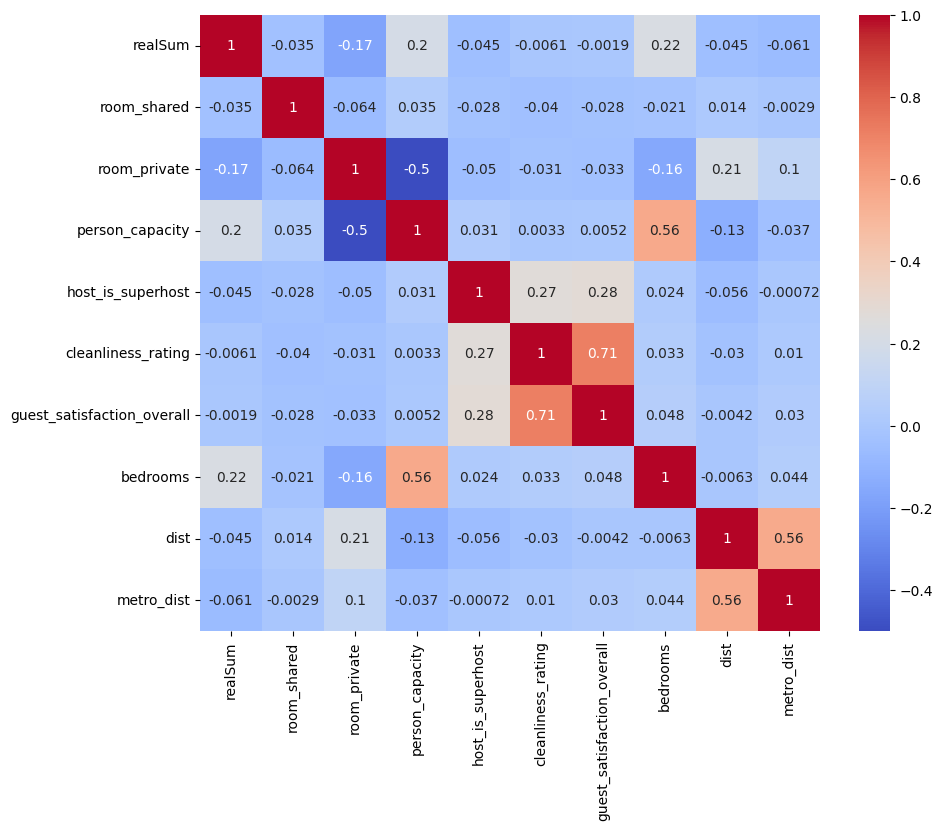

In [ ]:
#Heat-map showing correlation matrix
plt.figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.heatmap(cleaned_dataset.corr(),cmap='coolwarm',annot=True,ax=axes)

Since real sum(price of airbnb) did not have a high correlation with anything else, it was not further investigated

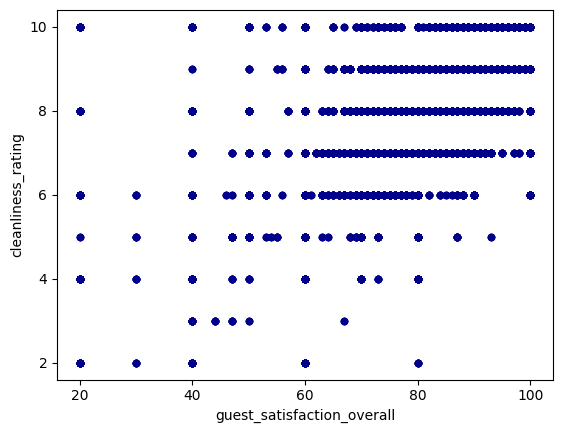

In [ ]:
ax1 = cleaned_dataset.plot.scatter(x='guest_satisfaction_overall',y='cleanliness_rating',c='DarkBlue')
plt.xticks(range(20,120,20))
plt.yticks(range(2,11,2))
plt.show()

Linear Regression from Sklearn package

In [ ]:

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score
print("Linear Regression: \n\n")
X = cleaned_dataset[['cleanliness_rating']]
y = cleaned_dataset['guest_satisfaction_overall']


X_train_linearRegression, X_test_linearRegression, y_train_linearRegression, y_test_linearRegression = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train_linearRegression, y_train_linearRegression)
y_pred_linearRegression = model.predict(X_test_linearRegression)


rating = {'cleanliness_rating': 5}
rating_df = pd.DataFrame([rating])

satisfaction = model.predict(rating_df)
print("Predicted guest satisfaction overall: ", satisfaction)





mse_linearRegression = mean_squared_error(y_test_linearRegression, y_pred_linearRegression)
print("\nMean Squared Error (MSE): ", mse_linearRegression)


y_pred_binary_linearRegression = [1 if y >= 75 else 0 for y in y_pred_linearRegression]
y_test_binary_linearRegression = [1 if y >= 75 else 0 for y in y_test_linearRegression]

f1score_linearRegression = f1_score(y_test_binary_linearRegression, y_pred_binary_linearRegression)
print("F1 score: ", f1score_linearRegression)

accuracy_linearRegression = accuracy_score(y_test_binary_linearRegression, y_pred_binary_linearRegression)
print("Accuracy: ", accuracy_linearRegression)

precision_LinearRegression = precision_score(y_test_binary_linearRegression, y_pred_binary_linearRegression)
print("Precision: ", precision_LinearRegression)

recall_LinearRegression = recall_score(y_test_binary_linearRegression, y_pred_binary_linearRegression)
print("Recall: ", recall_LinearRegression)

Linear Regression: 


Predicted guest satisfaction overall:  [63.24652733]

Mean Squared Error (MSE):  38.94703436233537
F1 score:  0.9861576244697478
Accuracy:  0.9730213218585312
Precision:  0.9774286346536845
Recall:  0.9950439288127957


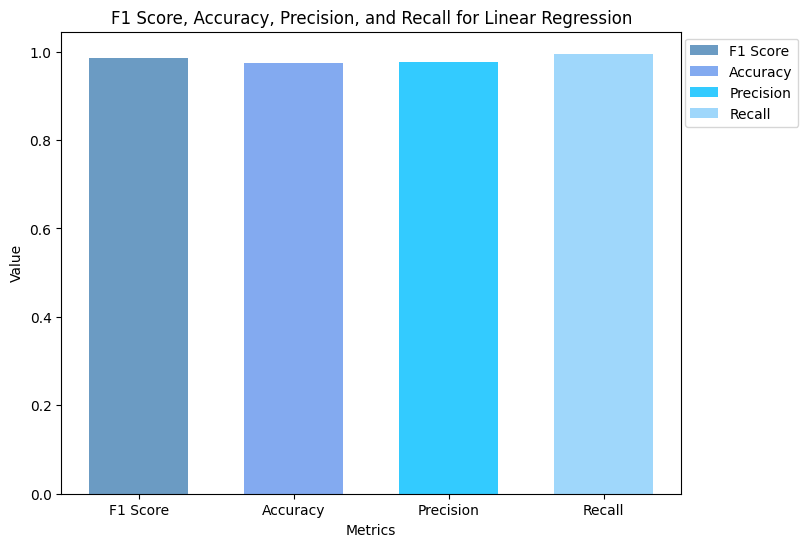

In [ ]:
# Create a bar chart with space between the bars
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8

index = [0]
bar1 = ax.bar(index, f1score_linearRegression, bar_width, alpha=opacity, color='steelblue', label='F1 Score')
bar2 = ax.bar(index[0] + bar_width + 0.2, accuracy_linearRegression, bar_width, alpha=opacity, color='cornflowerblue', label='Accuracy')
bar3 = ax.bar(index[0] + 2 * bar_width + 0.4, precision_LinearRegression, bar_width, alpha=opacity, color='deepskyblue', label='Precision')
bar4 = ax.bar(index[0] + 3 * bar_width + 0.6, recall_LinearRegression, bar_width, alpha=opacity, color='lightskyblue', label='Recall')

ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('F1 Score, Accuracy, Precision, and Recall for Linear Regression')
ax.set_xticks([index[0], index[0] + bar_width + 0.2, index[0] + 2 * bar_width + 0.4, index[0] + 3 * bar_width + 0.6])
ax.set_xticklabels(['F1 Score', 'Accuracy', 'Precision', 'Recall'])

# Move the legend (key) outside the bar chart
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

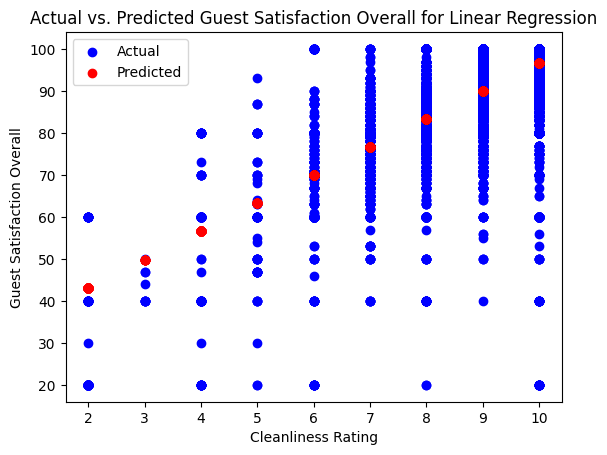

In [ ]:
plt.scatter(X_test_linearRegression, y_test_linearRegression, color='blue', label='Actual')
# plt.scatter(rating_df['cleanliness_rating'], satisfaction, color='red', label='Predicted')
plt.scatter(X_test_linearRegression, y_pred_linearRegression, color='red', label='Predicted')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Guest Satisfaction Overall')
plt.legend()
plt.title('Actual vs. Predicted Guest Satisfaction Overall for Linear Regression')
plt.show()

Training mean squared error: 39.290100030837
Test mean squared error: 38.94703436233537


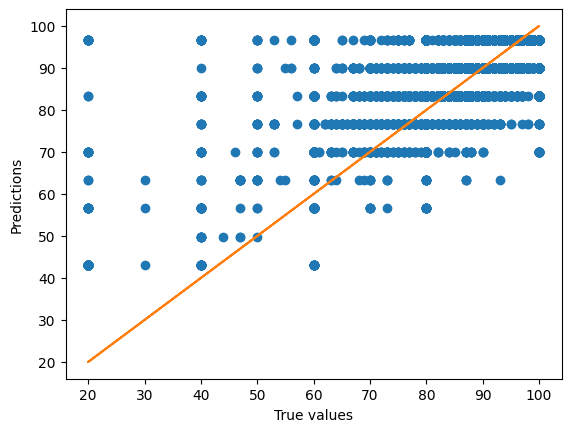

In [ ]:
history = model.fit(X_train_linearRegression, y_train_linearRegression)

y_pred_train_linearRegression = model.predict(X_train_linearRegression)
mse_train_linearRegression = mean_squared_error( y_train_linearRegression, y_pred_train_linearRegression)

y_pred_test_linearRegression = model.predict(X_test_linearRegression)
mse_test_linearRegression = mean_squared_error(y_test_linearRegression, y_pred_test_linearRegression)

print("Training mean squared error:", mse_train_linearRegression)
print("Test mean squared error:", mse_test_linearRegression)

plt.plot(y_test_linearRegression, y_pred_test_linearRegression, 'o')
plt.plot(y_test_linearRegression, y_test_linearRegression, '-')
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

Sensitivity Analysis for Linear Regression Model:

In [ ]:
baseline_rating = 5

# Compute the baseline satisfaction prediction
rating = {'cleanliness_rating': baseline_rating}
rating_df = pd.DataFrame([rating])
baseline_satisfaction = model.predict(rating_df)

# Perturb the cleanliness rating by ±10% and compute the satisfaction prediction
perturbations = np.linspace(-0.1, 0.1, num=21)
satisfaction_predictions = []
for perturbation in perturbations:
    perturbed_rating = baseline_rating * (1 + perturbation)
    rating = {'cleanliness_rating': perturbed_rating}
    rating_df = pd.DataFrame([rating])
    perturbed_satisfaction = model.predict(rating_df)
    satisfaction_predictions.append(perturbed_satisfaction)

# Compute the sensitivity metrics
delta_satisfaction = np.array(satisfaction_predictions) - baseline_satisfaction
sensitivity = delta_satisfaction / baseline_satisfaction

# Replace NaN values in sensitivity array with zeros
sensitivity = np.nan_to_num(sensitivity)

# Print the sensitivity metrics
print("Cleanliness rating sensitivity analysis results:")
for perturbation, sensitivity_metric in zip(perturbations, sensitivity):
    print(f"Perturbation: {perturbation}, Sensitivity: {sensitivity_metric}")

Cleanliness rating sensitivity analysis results:
Perturbation: -0.1, Sensitivity: [-0.05291119]
Perturbation: -0.09000000000000001, Sensitivity: [-0.04762007]
Perturbation: -0.08, Sensitivity: [-0.04232895]
Perturbation: -0.07, Sensitivity: [-0.03703783]
Perturbation: -0.060000000000000005, Sensitivity: [-0.03174671]
Perturbation: -0.05, Sensitivity: [-0.02645559]
Perturbation: -0.04000000000000001, Sensitivity: [-0.02116448]
Perturbation: -0.03, Sensitivity: [-0.01587336]
Perturbation: -0.020000000000000004, Sensitivity: [-0.01058224]
Perturbation: -0.010000000000000009, Sensitivity: [-0.00529112]
Perturbation: 0.0, Sensitivity: [0.]
Perturbation: 0.009999999999999995, Sensitivity: [0.00529112]
Perturbation: 0.01999999999999999, Sensitivity: [0.01058224]
Perturbation: 0.03, Sensitivity: [0.01587336]
Perturbation: 0.04000000000000001, Sensitivity: [0.02116448]
Perturbation: 0.04999999999999999, Sensitivity: [0.02645559]
Perturbation: 0.06, Sensitivity: [0.03174671]
Perturbation: 0.07, 

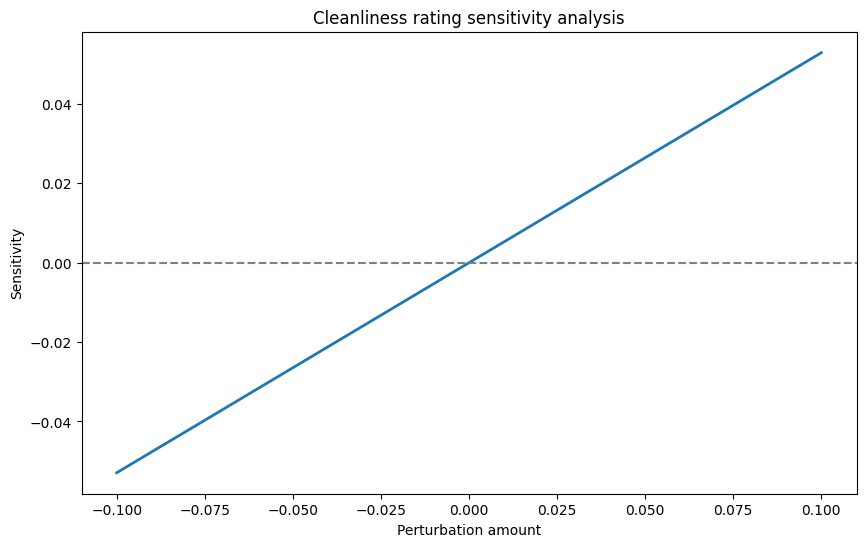

In [ ]:
# Extract perturbation and sensitivity data from output
perturbations = [x for x in perturbations]
sensitivities = [x[0] for x in sensitivity]

# Create line plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(perturbations, sensitivities, linewidth=2)
ax.axhline(y=0, color='gray', linestyle='--')
ax.set_xlabel('Perturbation amount')
ax.set_ylabel('Sensitivity')
ax.set_title('Cleanliness rating sensitivity analysis')
plt.show()

# Random Forest Regression

In [ ]:
print("Random Forest Regression: \n\n")

url = 'https://raw.githubusercontent.com/JessicaM16/COMP3610-Project/main/Project/CleanedData.csv'
cleaned_dataset = pd.read_csv(url)

X = cleaned_dataset[['cleanliness_rating']] 
y = cleaned_dataset['guest_satisfaction_overall'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

new_cleanliness_rating = 5 
new_feature_value = [[new_cleanliness_rating]]  
predicted_target_value = rf_model.predict(new_feature_value)

print("Predicted guest satisfaction overall: ", predicted_target_value)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error (MSE): ", mse)

y_pred_binary = [1 if y >= 75 else 0 for y in y_pred]
y_test_binary = [1 if y >= 75 else 0 for y in y_test]

f1score = f1_score(y_test_binary, y_pred_binary)
print("F1 score: ", f1score)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy: ", accuracy)

precision = precision_score(y_test_binary, y_pred_binary)
print("Precision: ", precision)

recall = recall_score(y_test_binary, y_pred_binary)
print("Recall: ", recall)


Random Forest Regression: 




/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted guest satisfaction overall:  [61.89975382]

Mean Squared Error (MSE):  38.003504611149886
F1 score:  0.9861576244697478
Accuracy:  0.9730213218585312
Precision:  0.9774286346536845
Recall:  0.9950439288127957


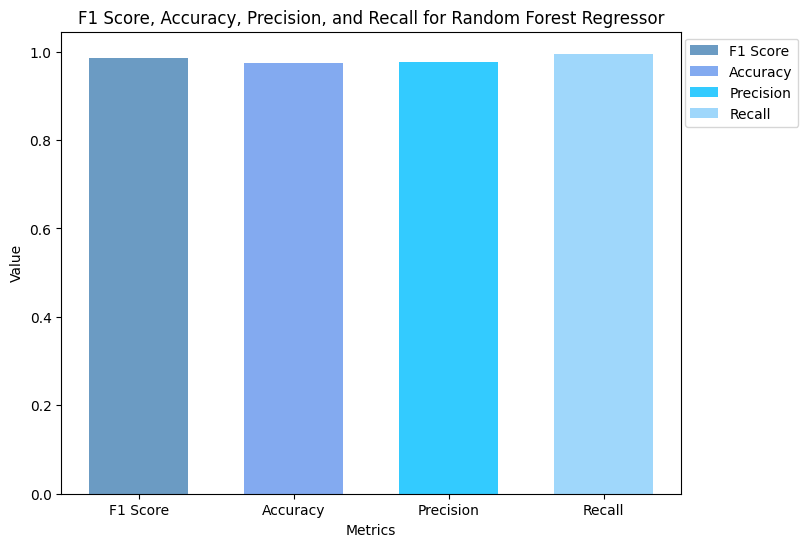

In [ ]:
# Create a bar chart with space between the bars
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
opacity = 0.8

index = [0]
bar1 = ax.bar(index, f1score, bar_width, alpha=opacity, color='steelblue', label='F1 Score')
bar2 = ax.bar(index[0] + bar_width + 0.2, accuracy, bar_width, alpha=opacity, color='cornflowerblue', label='Accuracy')
bar3 = ax.bar(index[0] + 2 * bar_width + 0.4, precision, bar_width, alpha=opacity, color='deepskyblue', label='Precision')
bar4 = ax.bar(index[0] + 3 * bar_width + 0.6, recall, bar_width, alpha=opacity, color='lightskyblue', label='Recall')

ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('F1 Score, Accuracy, Precision, and Recall for Random Forest Regressor')
ax.set_xticks([index[0], index[0] + bar_width + 0.2, index[0] + 2 * bar_width + 0.4, index[0] + 3 * bar_width + 0.6])
ax.set_xticklabels(['F1 Score', 'Accuracy', 'Precision', 'Recall'])

# Move the legend (key) outside the bar chart
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

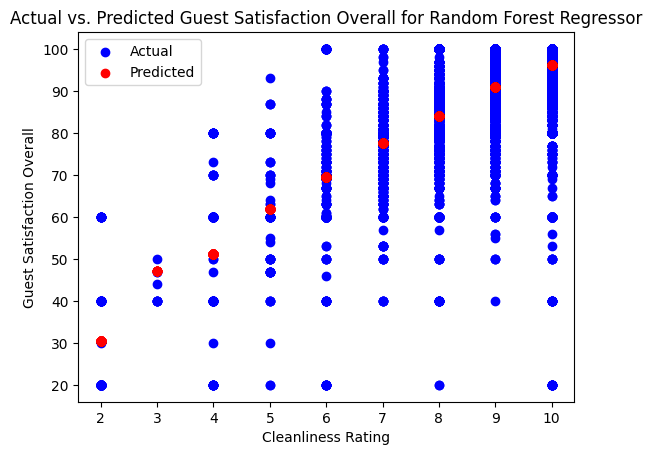

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
# plt.scatter(rating_df['cleanliness_rating'], satisfaction, color='red', label='Predicted')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Guest Satisfaction Overall')
plt.legend()
plt.title('Actual vs. Predicted Guest Satisfaction Overall for Random Forest Regressor')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


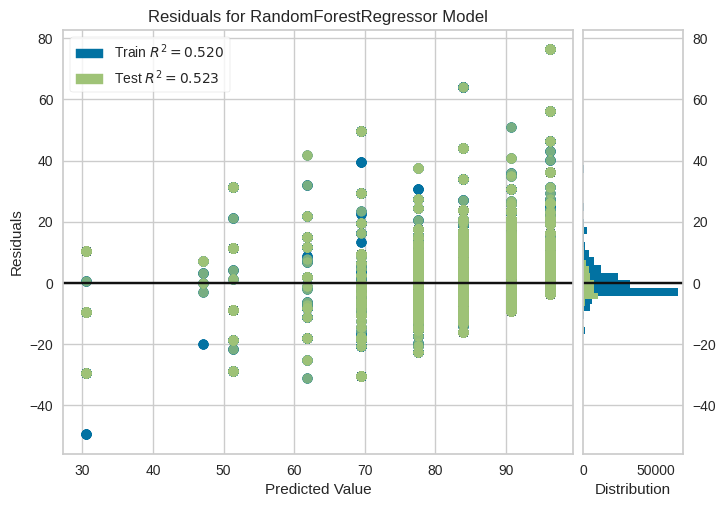

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(rf_model, color='blue')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
